In [1]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style('whitegrid')
%matplotlib inline

In [19]:
df = pd.read_csv('911.csv')


In [20]:
df.info

<bound method DataFrame.info of              lat        lng  \
0      40.297876 -75.581294   
1      40.258061 -75.264680   
2      40.121182 -75.351975   
3      40.116153 -75.343513   
4      40.251492 -75.603350   
...          ...        ...   
99487  40.132869 -75.333515   
99488  40.006974 -75.289080   
99489  40.115429 -75.334679   
99490  40.186431 -75.192555   
99491  40.207055 -75.317952   

                                                    desc      zip  \
0      REINDEER CT & DEAD END;  NEW HANOVER; Station ...  19525.0   
1      BRIAR PATH & WHITEMARSH LN;  HATFIELD TOWNSHIP...  19446.0   
2      HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...  19401.0   
3      AIRY ST & SWEDE ST;  NORRISTOWN; Station 308A;...  19401.0   
4      CHERRYWOOD CT & DEAD END;  LOWER POTTSGROVE; S...      NaN   
...                                                  ...      ...   
99487  MARKLEY ST & W LOGAN ST; NORRISTOWN; 2016-08-2...  19401.0   
99488  LANCASTER AVE & RITTENHOUSE PL; LOWE

In [21]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1


In [22]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [24]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [31]:
df['reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [32]:
df['reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: reason, dtype: int64

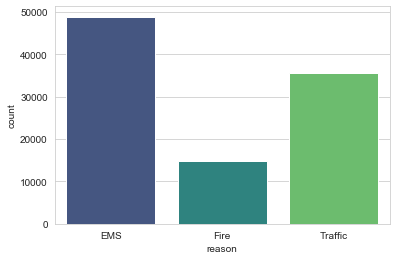

In [34]:
sns.countplot(x='reason',data=df,palette='viridis')

In [36]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [40]:
df['hour']=df['timeStamp'].apply(lambda time:time.hour)
df['month']=df['timeStamp'].apply(lambda time:time.month)
df['dayofweek']=df['timeStamp'].apply(lambda time:time.dayofweek)

In [42]:
dmap={0:'mon',1:'tue',2:'wed',3:'thu',4:'fri',5:'sat',6:'sun'}

In [47]:
df['dayofweek']=df['dayofweek'].map(dmap)

NameError: name 'block_to_anchor' is not defined

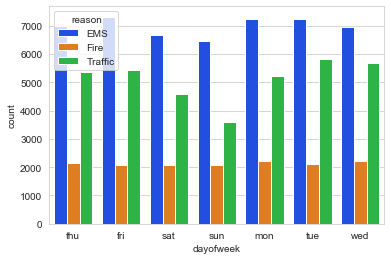

In [51]:
sns.countplot(x='dayofweek',data=df,hue='reason',palette='bright')
plt.legend(block_to_anchor(1,0,5,1),loc=2,borderaxespad=0)